In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm

In [11]:
# Creating a dictionary containing the data
data = {
    'CRIM': [0.00632, 0.02731, 0.02729, 0.03237, 0.06905],
    'ZN': [18.0, 0.0, 0.0, 0.0, 0.0],
    'INDUS': [2.31, 7.07, 7.07, 2.18, 2.18],
    'CHAS': [0, 0, 0, 0, 0],
    'NOX': [0.538, 0.469, 0.469, 0.458, 0.458],
    'RM': [6.575, 6.421, 7.185, 6.998, 7.147],
    'AGE': [65.2, 78.9, 61.1, 45.8, 54.2],
    'DIS': [4.0900, 4.9671, 4.9671, 6.0622, 6.0622],
    'RAD': [1, 2, 2, 3, 3],
    'TAX': [296, 242, 242, 222, 222],
    'PTRATIO': [15.3, 17.8, 17.8, 18.7, 18.7],
    'LSTAT': [4.98, 9.14, 4.03, 2.94, 5.33],
    'MEDV': [24.0, 21.6, 34.7, 33.4, 36.2]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Print the first few rows of the DataFrame
print(df.head(3))

# Basic statistics of the dataset
print(df.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
           CRIM         ZN     INDUS  CHAS       NOX        RM        AGE  \
count  5.000000   5.000000  5.000000   5.0  5.000000  5.000000   5.000000   
mean   0.032468   3.600000  4.162000   0.0  0.478400  6.865200  61.040000   
std    0.022778   8.049845  2.655159   0.0  0.033768  0.346716  12.402943   
min    0.006320   0.000000  2.180000   0.0  0.458000  6.421000  45.800000   
25%    0.027290   0.000000  2.180000   0.0  0.458000  6.575000  54.200000   
50%    0.027310   0.000000  2.310000   0.0  0.469000  6.998000  61.100000   
75%    0.032370   0.000000  7.070000   0.0  0.469000  7.147000  65.20000

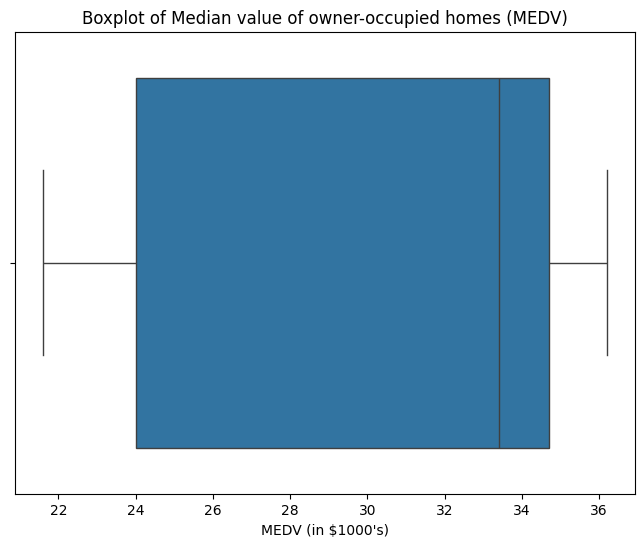

In [12]:
# Boxplot for "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes (MEDV)')
plt.xlabel('MEDV (in $1000\'s)')
plt.show()

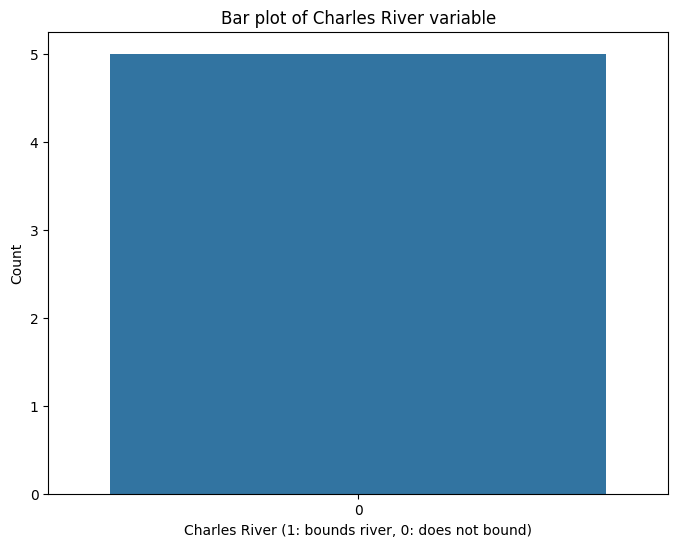

In [13]:
# Bar plot for the Charles river variable
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Bar plot of Charles River variable')
plt.xlabel('Charles River (1: bounds river, 0: does not bound)')
plt.ylabel('Count')
plt.show()

In [14]:
# Discretize the AGE variable into three groups
df['AGE_Group'] = pd.cut(df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

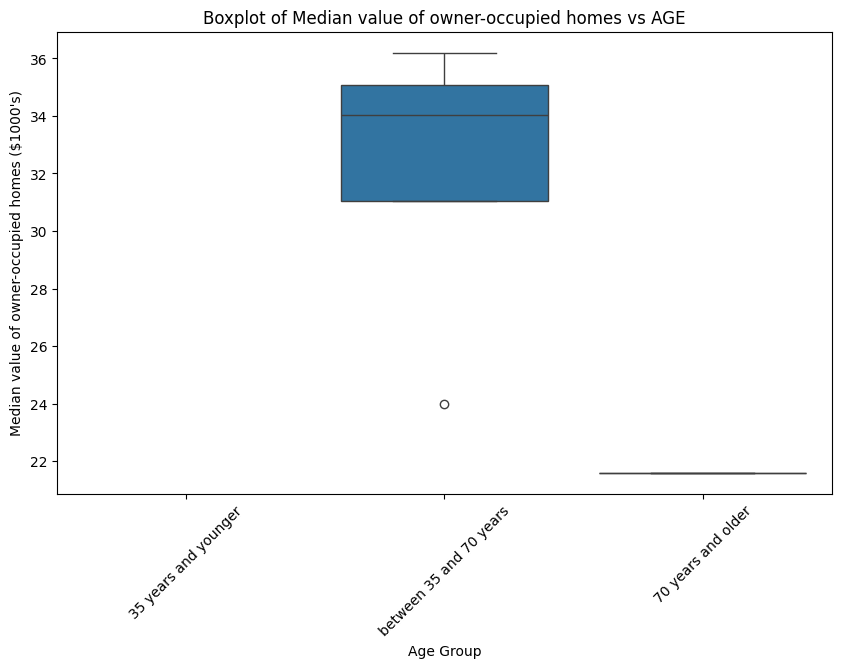

In [15]:
# Boxplot for MEDV variable vs AGE variable groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=df)
plt.title('Boxplot of Median value of owner-occupied homes vs AGE')
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes ($1000\'s)')
plt.xticks(rotation=45)
plt.show()

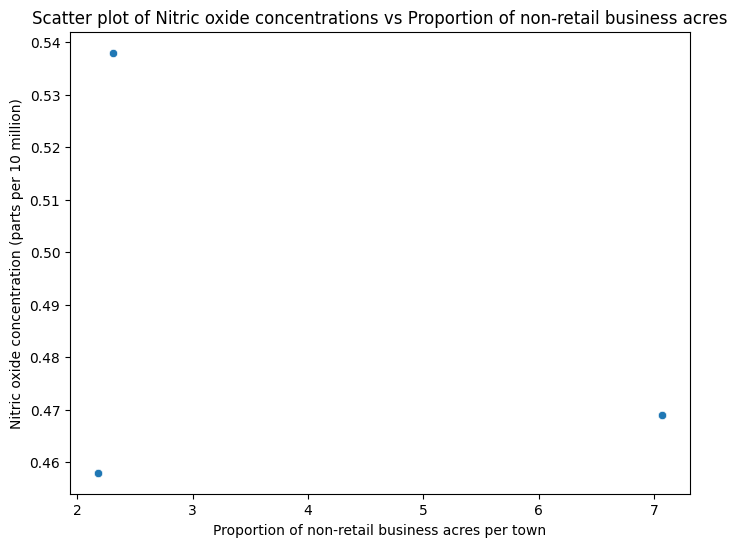

In [16]:
# Scatter plot for Nitric oxide concentrations vs proportion of non-retail business acres per town
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title('Scatter plot of Nitric oxide concentrations vs Proportion of non-retail business acres')
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Nitric oxide concentration (parts per 10 million)')
plt.show()

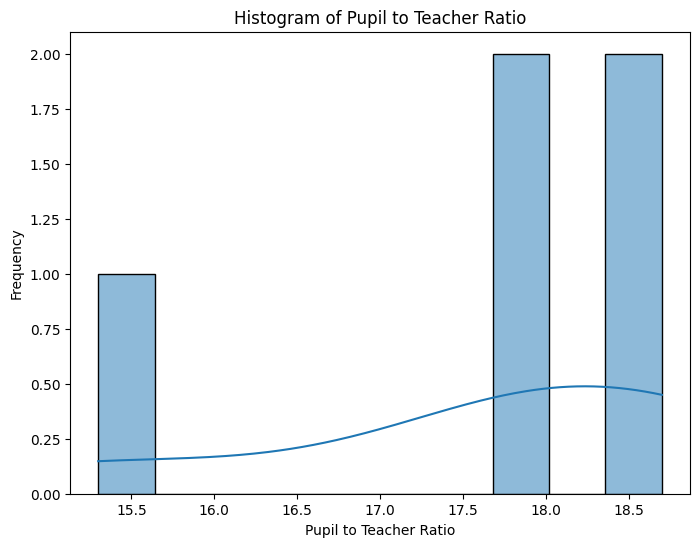

In [17]:
# Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(8, 6))
sns.histplot(df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Perform T-test
charles_river = df[df['CHAS'] == 1]['MEDV']
not_charles_river = df[df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(charles_river, not_charles_river)

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in median value of houses bounded by the Charles river.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in median value of houses bounded by the Charles river.")

In [ ]:
# Perform ANOVA
f_stat, p_value = f_oneway(df['MEDV'][df['AGE'] == 65.2],
                            df['MEDV'][df['AGE'] == 78.9],
                            df['MEDV'][df['AGE'] == 61.1],
                            df['MEDV'][df['AGE'] == 45.8],
                            df['MEDV'][df['AGE'] == 54.2])

# Check significance
if p_value < alpha:
    print("Reject null hypothesis: There is a difference in Median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")
else:
    print("Fail to reject null hypothesis: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940 (AGE).")

In [ ]:
# Perform Pearson correlation
corr, p_value = pearsonr(df['NOX'], df['INDUS'])

# Check significance
if p_value < alpha:
    print("Reject null hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject null hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


In [ ]:
# Prepare data for regression analysis
X = df['DIS']  # Independent variable
y = df['MEDV']  # Dependent variable
X = sm.add_constant(X)  # Add constant for intercept

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get regression results
print(model.summary())
